In [ ]:
## Add you code here
library(devtools)
# install_github("Soilsecuritylab/spectroscopy_package", auth_token = "03ab45a2fe69f304a65973b1a8eb3a416428fe51")
install.packages("tripack")
install.packages("SDMTools")
install.packages("pls")
install.packages("Cubist")
install.packages("randomForest")
install.packages("caret")
install.packages("ggplot")

install.packages("prospectr")
install.packages("pls")
install.packages("Cubist")
install.packages("randomForest")
install.packages( pkgs = "soiltexture" )
install.packages("plotrix")
install.packages("FactoMineR")
install.packages("Peaks")
install.packages("rlang")
install.packages("glue")



Loading required package: usethis

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘SDMTools’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Warning message in install.packages("Cubist"):
“installation of package ‘reshape2’ had non-zero exit status”
Warning message in install.packages("Cubist"):
“installation of package ‘Cubist’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packag

In [ ]:
install.packages("randomForest")
library(randomForest)

install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
#library(ggplot2)

library(randomForest)
library(caret)

In [1]:
#setwd("D:/Jingyi/1.Research/1.InPreparation/0.Carbon_WI/Analysis/R")

# import the data in csv format
soil_data<-read.table('/content/soil.txt',header = T,sep = ",")

soil_data<-na.exclude(soil_data)


soil.df<-soil_data[,-c(1:4,17,20)]
soil.df[,16]<-as.factor(soil.df[,16])

nd<-nrow(soil.df)# number of data


# Split Calibration: 75% and Validation 25%
set.seed(111)# set a randoms seed (so you don't get different results every time)
ic<-sample(1:nd, round(nd*0.75))# generate a random permutation of data

#This forms the calibration set
cali<-soil.df[ic,]
#This forms the validation set
vali<-soil.df[-ic,]


In [2]:
str(vali)

'data.frame':	735 obs. of  17 variables:
 $ SOC      : num  0.2179 0.0813 1.0705 1.866 0.4683 ...
 $ Depth    : int  60 100 30 15 30 200 100 30 100 5 ...
 $ dem      : int  499 484 390 412 412 412 384 369 369 378 ...
 $ slope    : num  7.45e-02 3.44e-05 6.00e-02 6.69e-05 6.69e-05 ...
 $ aspect   : num  5.818 1.286 0.589 2.356 2.356 ...
 $ hillshade: num  0.715 0.785 0.775 0.785 0.785 ...
 $ twi      : num  5.74 11.18 5.94 9.71 9.71 ...
 $ mrvbf    : num  0.644 4.624 2.633 6.674 6.674 ...
 $ clay     : int  3 13 8 9 10 11 12 8 8 9 ...
 $ silt     : int  28 33 46 55 56 24 19 33 22 37 ...
 $ sand     : int  69 54 46 36 34 65 69 59 70 54 ...
 $ pH       : num  5.2 5.2 5.3 5.1 5.2 5.7 5.3 5.3 5.5 5.1 ...
 $ tmax     : num  9.53 10.7 12.19 11.59 11.59 ...
 $ tmin     : num  -2.242 -1.119 0.2 -0.474 -0.474 ...
 $ prcp     : int  848 817 845 761 761 761 837 833 833 763 ...
 $ lc       : Factor w/ 8 levels "8","9","10","11",..: 2 1 5 5 5 5 1 6 6 8 ...
 $ lc2      : chr  "Forest" "Forest" "Cropl

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



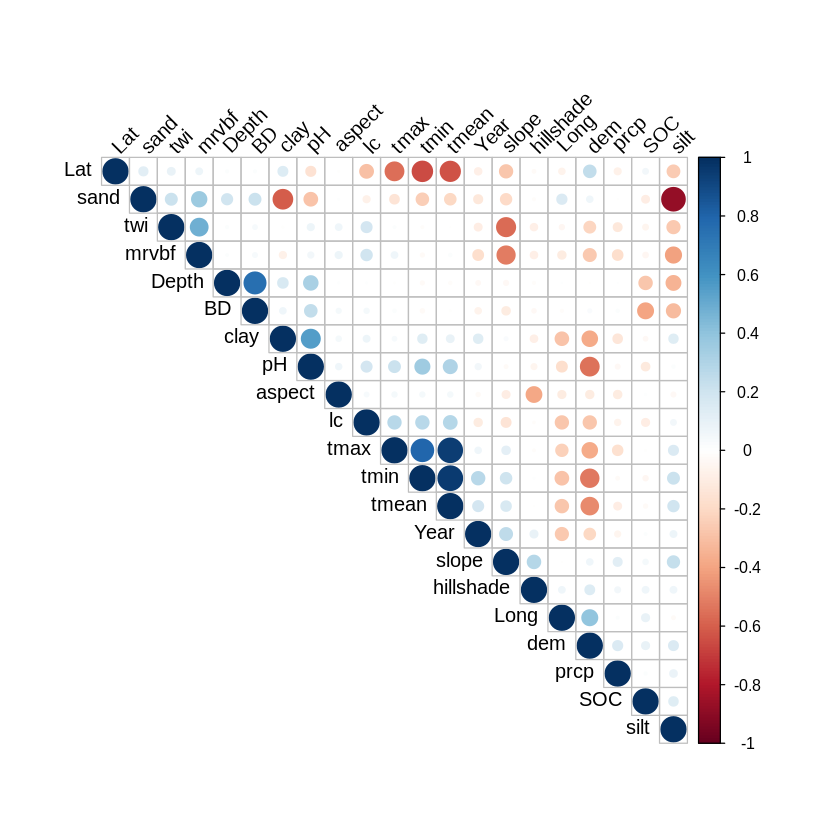

In [3]:
install.packages("corrplot")
library(corrplot)

numeric_data <- soil_data[, sapply(soil_data, is.numeric)]
# Compute the correlation matrix
correlation_matrix <- cor(numeric_data)

# Plot the correlation matrix
corrplot(correlation_matrix, method="circle", type="upper", order="hclust", tl.col="black", tl.srt=45)

In [4]:
install.packages("randomForest")
library(randomForest)

soil_rf_model <- randomForest(SOC ~ Depth+tmax+tmin+prcp+lc+clay+silt+sand+dem+slope+aspect+hillshade+twi+mrvbf, data=cali, ntree=500, mtry=10, importance=TRUE)
summary(soil_rf_model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted       2206   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       2206   -none- numeric  
importance        28   -none- numeric  
importanceSD      14   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               2206   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [5]:
importance(soil_rf_model)


,%IncMSE,IncNodePurity
Depth,19.076071,3796.1963
tmax,14.600053,3553.6309
tmin,9.222260,787.4689
prcp,7.208153,495.0744
lc,6.970302,362.0841
clay,14.064724,1158.9514
silt,4.003717,1239.8672
sand,5.379144,1010.4044
dem,16.349119,2244.0044
slope,8.383127,979.8749



Call:
 randomForest(formula = SOC ~ Depth + tmax + tmin + prcp + lc +      clay + silt + sand + dem + slope + aspect + hillshade + twi +      mrvbf, data = cali, ntree = 500, mtry = 10, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 5.986867
                    % Var explained: 48.79
NULL
            %IncMSE IncNodePurity
Depth     19.076071     3796.1963
tmax      14.600053     3553.6309
tmin       9.222260      787.4689
prcp       7.208153      495.0744
lc         6.970302      362.0841
clay      14.064724     1158.9514
silt       4.003717     1239.8672
sand       5.379144     1010.4044
dem       16.349119     2244.0044
slope      8.383127      979.8749
aspect    14.782777     3778.6955
hillshade 15.436514     1597.5239
twi        8.849213     1378.9212
mrvbf      8.053772     1076.5318
[1] "MSE: 5.98686650548566"
[1] "% Variance Explained: 0

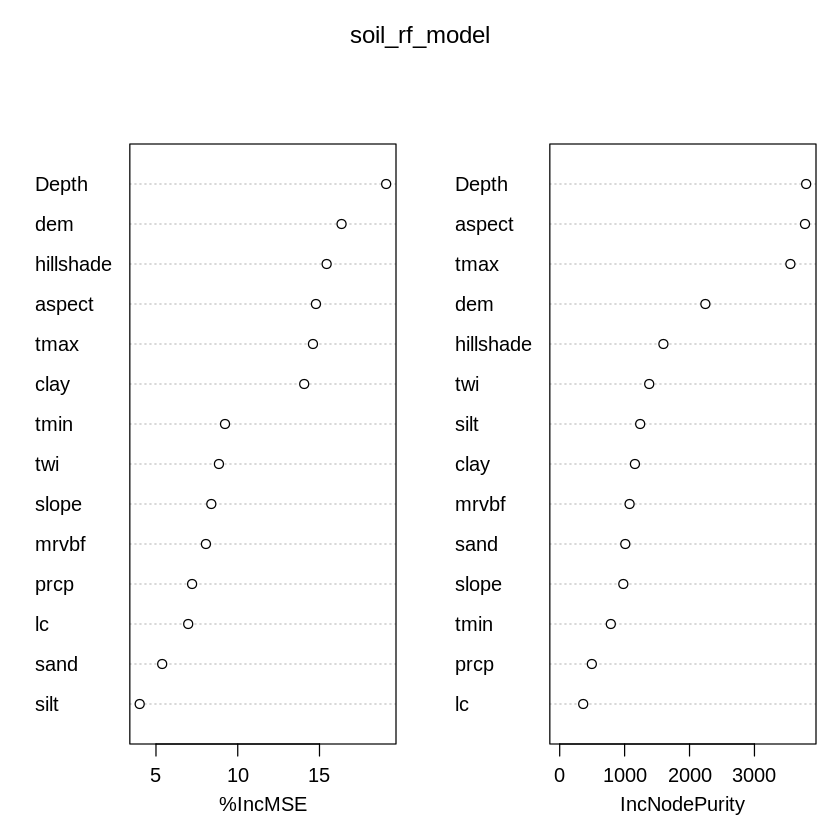

In [6]:
# Print the basic summary of the model
print(soil_rf_model)

# Access and print the error rates
error_rate <- soil_rf_model$err.rate
print(error_rate)

# Get and print the importance of each variable
variable_importance <- importance(soil_rf_model)
print(variable_importance)

# Plot the variable importance
varImpPlot(soil_rf_model)

# Predict using the trained model on the same dataset (or a new dataset)
predictions <- predict(soil_rf_model, newdata=cali)
#print(predictions)

# Calculate and print the Mean Squared Error and variance explained
mse <- mean((soil_rf_model$y - soil_rf_model$predicted)^2)
var_explained <- 1 - mse / var(soil_rf_model$y)
print(paste("MSE:", mse))
print(paste("% Variance Explained:", var_explained))


In [7]:
#########################################################
##################### Randomforest ############################
#########################################################

# Build a RF model
soil_c.rf_model <- randomForest(SOC ~ Depth+tmax+tmin+prcp+lc+clay+silt+sand+dem+slope+aspect+hillshade+twi+mrvbf, data=cali, ntree=500, mtry=10, importance=TRUE)
summary(soil_c.rf_model)




                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted       2206   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       2206   -none- numeric  
importance        28   -none- numeric  
importanceSD      14   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               2206   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [8]:
library(tidyverse)

# Predict on to the calibration data
soil_c.rf_predict<-predict(soil_c.rf_model , cali)


# Define filenames (replace with your desired names)
model_filename <- "rf_model.rds"
predict_filename <- "rf_prediction.rds"

# Save the model object using write_rds() (more efficient)
write_rds(soil_c.rf_model , file = model_filename)

# Save the prediction object using save() or write_rds()
save(soil_c.rf_predict, file = predict_filename)

# OR (alternative with write_rds())
write_rds(soil_c.rf_predict, file = predict_filename)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()     masks base::%||%()
✖ dplyr::combine()  masks randomForest::combine()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks randomForest::margin()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [11]:
install.packages("reticulate")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’




In [13]:
# Cargar la librería reticulate
library(reticulate)

# Cargar los objetos RDS en R
rf_model <- readRDS("rf_model.rds")
rf_prediction <- readRDS("rf_prediction.rds")

# Guardar los objetos como pickle utilizando reticulate
py_run_string("import pickle")

# Define los nombres de archivo para los objetos pickle
model_pickle_filename <- "rf_model.pkl"
prediction_pickle_filename <- "rf_prediction.pkl"



In [19]:
model_pickle_filename <- "rf_model2.pkl"

py_run_string(paste0("with open('", model_pickle_filename, "', 'wb') as file: pickle.dump(", rf_model, ", file)"))


ERROR: Error in eval(expr, envir, enclos): Expecting a single string value: [type=character; extent=18].


In [20]:
# Guardar el objeto del modelo como pickle
py_run_string(paste0("with open('", model_pickle_filename, "', 'wb') as file: pickle.dump(rf_model, file)"))


ERROR: name 'rf_model' is not defined

In [21]:
py_run_string(paste0("with open('", prediction_pickle_filename, "', 'wb') as file: pickle.dump(rf_prediction, file)"))



ERROR: name 'rf_prediction' is not defined

In [ ]:
library(spectroscopy)
library(signal); library(plyr);
library(tripack); library(SDMTools);
library(pls)
library(Cubist)

ERROR: Error in library(spectroscopy): there is no package called ‘spectroscopy’


In [ ]:
# import the data in csv format
soil_data<-read.table('/content/soil.txt',header = T,sep = ",")

soil_data<-na.exclude(soil_data)

soil.df<-soil_data[,-c(1:4,17,20)]


soil.df$lc2<-"lc"

soil.df[soil.df[,16]==8, 17]<- "Forest"
soil.df[soil.df[,16]==9, 17]<- "Forest"
soil.df[soil.df[,16]==10, 17]<- "Forest"
soil.df[soil.df[,16]==11, 17]<- "Grassland"
soil.df[soil.df[,16]==13, 17]<- "Cropland"
soil.df[soil.df[,16]==14, 17]<- "Pasture"
soil.df[soil.df[,16]==15, 17]<- "Wetland"
soil.df[soil.df[,16]==16, 17]<- "Wetland"




soil.df$lc2<-as.factor(soil.df$lc2)

table(soil.df$lc2)

nd<-nrow(soil.df)# number of data
nlength<-length(unique(soil_data$Soil_ID))

# Split Calibration: 75% and Validation 25%
set.seed(111)# set a randoms seed (so you don't get different results every time)
ic<-sample(unique(soil_data$Soil_ID), round(nlength*0.75))# generate a random permutation of data

cali_index<- soil_data$Soil_ID %in% ic

summary(cali_index)




 Cropland    Forest Grassland   Pasture   Wetland 
      658      1528        12       649        94 

   Mode   FALSE    TRUE 
logical     737    2204 

In [ ]:
#This forms the calibration set
cali<-soil.df[cali_index,]
#This forms the validation set
vali<-soil.df[!cali_index,]


In [ ]:
#########################################################
##################### Randomforest ############################
#########################################################
if (!requireNamespace("caret", quietly = TRUE)) {
  install.packages("caret")
}

# Load the caret package
library(caret)


fitControl = trainControl(## 10-fold CV
  method = "repeatedcv",
  number = 10,
  ## repeated ten times
  repeats = 10
    )

rf_model = train(x = cali[,-c(1,16)],  y = cali[,1],  na.action = na.omit,  trControl = fitControl,  method="rf", metric = "RMSE")

# Build a RF model
#soil_c.rf_model <- randomForest(SOC ~ Depth+tmax+tmin+prcp+lc2+clay+silt+sand+dem+slope+aspect+hillshade+twi+mrvbf, data=cali, ntree=500, mtry=10, importance=TRUE)

summary(rf_model)



In [ ]:
library(tidyverse)

# Predict on to the calibration data
soil_c.rf_predict<-predict(soil_c.rf_model , cali)


# Define filenames (replace with your desired names)
model_filename <- "rf_model.rds"
predict_filename <- "rf_prediction.rds"

# Save the model object using write_rds() (more efficient)
write_rds(soil_c.rf_model , file = model_filename)

# Save the prediction object using save() or write_rds()
save(soil_c.rf_predict, file = predict_filename)

# OR (alternative with write_rds())
write_rds(soil_c.rf_predict, file = predict_filename)

In [ ]:
soil_c.rf_model <- rf_model